In [1]:

!python -m pip install kagglehub
!python -m pip install fastparquet


In [2]:
import kagglehub

path = kagglehub.dataset_download("mauriciy/daily-spanish-gas-prices")

print("Path to dataset files:", path)

c:\Users\azmyn\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\azmyn\.cache\kagglehub\datasets\mauriciy\daily-spanish-gas-prices\versions\5


In [3]:
import os
folder_path = r"C:\Users\azmyn\.cache\kagglehub\datasets\mauriciy\daily-spanish-gas-prices\versions\5"
print(os.listdir(folder_path))



['spanish_gas_prices.parquet']


In [4]:
import pandas as pd

file_path = r"C:\Users\azmyn\.cache\kagglehub\datasets\mauriciy\daily-spanish-gas-prices\versions\5\spanish_gas_prices.parquet"

# Load the Parquet file
data = pd.read_parquet(file_path)

# Display the first few rows of the dataset
print(data.head())


   station_id        date gasoline_95E5 gasoline_95E5_premium gasoline_95E10  \
0       15614  2023-07-29          None                  None           None   
1        9021  2023-07-29   1.528000000                  None           None   
2       14984  2023-07-29   1.644000000                  None           None   
3       14743  2023-07-29   1.540000000                  None           None   
4       12614  2023-07-29   1.548000000                  None           None   

  gasoline_98E5 gasoline_98E10     diesel_A     diesel_B diesel_premium  ...  \
0          None           None  1.530000000         None           None  ...   
1          None           None  1.379000000  1.140000000           None  ...   
2   1.776000000           None  1.495000000         None    1.561000000  ...   
3          None           None  1.370000000         None    1.420000000  ...   
4          None           None  1.448000000         None           None  ...   

  road_side restriction sender        

In [5]:
print(data.columns)
print(data.describe())
print(data.isnull().sum())



Index(['station_id', 'date', 'gasoline_95E5', 'gasoline_95E5_premium',
       'gasoline_95E10', 'gasoline_98E5', 'gasoline_98E10', 'diesel_A',
       'diesel_B', 'diesel_premium', 'bioetanol', 'biodiesel', 'lpg', 'cng',
       'lng', 'hydrogen', 'name', 'address', 'town', 'zip_code', 'longitude',
       'latitude', 'road_side', 'restriction', 'sender', 'schedule',
       'region_id', 'region_name', 'province_id', 'province_name',
       'municipality_id', 'municipality_name'],
      dtype='object')
         station_id     longitude      latitude     region_id   province_id  \
count  5.660732e+07  5.660625e+07  5.660625e+07  5.660732e+07  5.660732e+07   
mean   6.415479e+03 -3.307554e+00  3.966804e+01  7.909024e+00  2.514566e+01   
std    4.037010e+03  4.015035e+00  3.173154e+00  4.539831e+00  1.445732e+01   
min    1.000000e+00 -1.801194e+01 -4.038306e+00  1.000000e+00  1.000000e+00   
25%    2.990000e+03 -5.497333e+00  3.807428e+01  4.000000e+00  1.200000e+01   
50%    6.025000e+03 -3

In [6]:
filtered_data = data[data['region_name'] == 'Madrid']
print(filtered_data.head())


     station_id        date gasoline_95E5 gasoline_95E5_premium  \
37        14661  2023-07-29   1.569000000                  None   
39        14740  2023-07-29   1.569000000                  None   
44         3075  2023-07-29   1.709000000                  None   
109        3148  2023-07-29   1.709000000                  None   
127       13525  2023-07-29   1.589000000                  None   

    gasoline_95E10 gasoline_98E5 gasoline_98E10     diesel_A     diesel_B  \
37            None          None           None  1.369000000         None   
39            None          None           None  1.419000000         None   
44            None   1.854000000           None  1.559000000         None   
109           None          None           None  1.579000000  1.329000000   
127           None          None           None  1.399000000         None   

    diesel_premium  ... road_side restriction sender  \
37            None  ...         D           P     dm   
39     1.429000000  ..

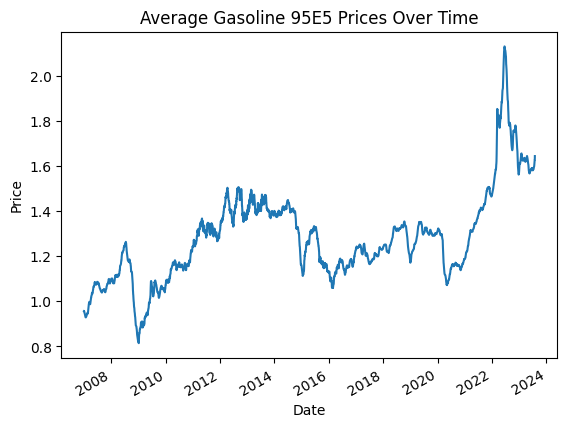

In [7]:
import matplotlib.pyplot as plt

# Example for Gasoline 95E5
data['date'] = pd.to_datetime(data['date'])  # Ensure 'date' is datetime
data.groupby('date')['gasoline_95E5'].mean().plot()
plt.title('Average Gasoline 95E5 Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()


In [8]:
# Check unique station names to confirm where "GALP" appears
unique_station_names = data['name'].unique()
print("Unique station names:", unique_station_names)

# Filter the dataset for stations with "GALP" in the name
galp_stations = data[data['name'].str.contains('GALP', case=False, na=False)]

# Check the number of GALP stations
print(f"Number of GALP stations: {galp_stations.shape[0]}")

# Display the first few rows of GALP stations
print(galp_stations.head())



Unique station names: ['ALSA' 'COOP. Nª Sª DE LA ASUNCION DE SONEJA' 'CEPSA' ... 'E.S. SARASA I'
 'E.S. SARASA II' 'BARCELONA M.A.C']
Number of GALP stations: 2940673
    station_id       date gasoline_95E5 gasoline_95E5_premium gasoline_95E10  \
6         7071 2023-07-29   1.784000000                  None           None   
13        3748 2023-07-29   1.689000000                  None           None   
15        1865 2023-07-29   1.589000000           1.639000000           None   
25        7462 2023-07-29   1.724000000                  None           None   
26        3499 2023-07-29   1.724000000                  None           None   

   gasoline_98E5 gasoline_98E10     diesel_A     diesel_B diesel_premium  ...  \
6    1.924000000           None  1.614000000         None    1.704000000  ...   
13   1.829000000           None  1.534000000         None    1.584000000  ...   
15          None           None  1.479000000         None    1.549000000  ...   
25   1.864000000           N

In [9]:
# Display the 'name' column of filtered GALP data
print(galp_stations['name'].unique())


['GALP' 'GALP ENERGIA' 'GALP&GO' 'GALP DISTRIBUCION OIL ESPAÑA, S.A.U.'
 'GALP - AMERICAN PETROL' 'GALP/3CAMINOS-VALENCIA' 'GALP-3 CAMINOS'
 'GALP LA JUNQUERA' 'EESS DE CABANES GALP 40 PIES' 'GALP-3CAMINOS UTIEL'
 'GALP (E.S. ANTUNEZ)' 'GALP ARRIONDAS' 'GALP ENERGIA ESPAÑA, S.A.U.']


In [10]:
galp_stations = data[data['name'].str.contains('GALP', case=True, na=False)]
print(galp_stations['name'].unique())


['GALP' 'GALP ENERGIA' 'GALP&GO' 'GALP DISTRIBUCION OIL ESPAÑA, S.A.U.'
 'GALP - AMERICAN PETROL' 'GALP/3CAMINOS-VALENCIA' 'GALP-3 CAMINOS'
 'GALP LA JUNQUERA' 'EESS DE CABANES GALP 40 PIES' 'GALP-3CAMINOS UTIEL'
 'GALP (E.S. ANTUNEZ)' 'GALP ARRIONDAS' 'GALP ENERGIA ESPAÑA, S.A.U.']


In [11]:
false_positives = galp_stations[~galp_stations['name'].str.match(r'\bGALP\b', case=False)]
print(false_positives)


          station_id       date gasoline_95E5 gasoline_95E5_premium  \
9020           12613 2023-07-29   1.799000000                  None   
17248          12613 2023-07-28   1.729000000                  None   
27404          12613 2023-07-27   1.729000000                  None   
39735          12613 2023-07-26   1.729000000                  None   
50721          12613 2023-07-25   1.729000000                  None   
...              ...        ...           ...                   ...   
35809571       12613 2013-12-09   1.435000000                  None   
35821790       12613 2013-12-08   1.435000000                  None   
35830884       12613 2013-12-07   1.435000000                  None   
35840672       12613 2013-12-06   1.435000000                  None   
35849560       12613 2013-12-05   1.435000000                  None   

         gasoline_95E10 gasoline_98E5 gasoline_98E10     diesel_A  \
9020               None          None           None  1.599000000   
17248    

In [12]:
print(false_positives['name'].unique())


['EESS DE CABANES GALP 40 PIES']


In [13]:
print(galp_stations[['region_name', 'municipality_name', 'schedule']].head())


             region_name municipality_name          schedule
6              Andalucia          Marbella          L-D: 24H
13  Comunidad Valenciana         Elche/Elx  L-D: 06:00-22:00
15              Cataluña          Terrassa          L-D: 24H
25             Andalucia           Sevilla          L-D: 24H
26  Comunidad Valenciana             Nules  L-D: 06:00-22:00


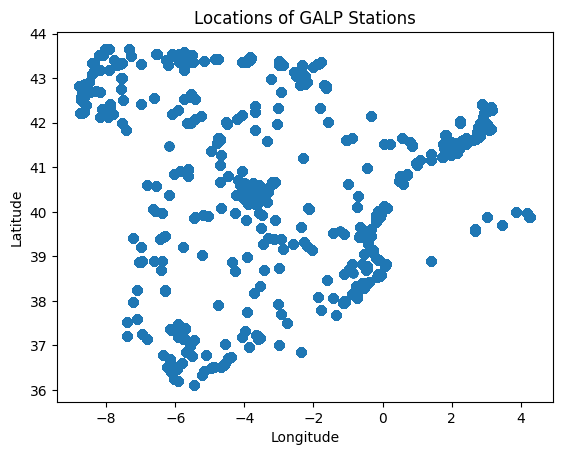

In [14]:
import matplotlib.pyplot as plt

plt.scatter(galp_stations['longitude'], galp_stations['latitude'], alpha=0.5)
plt.title('Locations of GALP Stations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [15]:
# Filter for Madrid in region_name, municipality_name, or town
madrid_stations = galp_stations[
    (galp_stations['region_name'].str.contains('Madrid', case=False, na=False)) |
    (galp_stations['municipality_name'].str.contains('Madrid', case=False, na=False)) |
    (galp_stations['town'].str.contains('Madrid', case=False, na=False))
]

# Display the first few rows of stations in Madrid or surrounding area
print(madrid_stations[['name', 'town', 'region_name', 'municipality_name', 'longitude', 'latitude']].head())


      name               town region_name  municipality_name  longitude  \
44    GALP          VALDEMORO      Madrid          Valdemoro  -3.692694   
441   GALP              PARLA      Madrid              Parla  -3.763778   
1005  GALP  ALCALA DE HENARES      Madrid  Alcalá de Henares  -3.388028   
1125  GALP            COSLADA      Madrid            Coslada  -3.533444   
1557  GALP           BUTARQUE      Madrid            Leganés  -3.797444   

       latitude  
44    40.185500  
441   40.251194  
1005  40.494167  
1125  40.432944  
1557  40.346278  


In [16]:
# Define bounds for the Madrid Metro Area
latitude_bounds = (39.8, 41.2)  # Latitude range
longitude_bounds = (-4.5, -2.5)  # Longitude range

# Filter stations within the Madrid Metro Area
madrid_metro_stations = galp_stations[
    (galp_stations['latitude'] >= latitude_bounds[0]) &
    (galp_stations['latitude'] <= latitude_bounds[1]) &
    (galp_stations['longitude'] >= longitude_bounds[0]) &
    (galp_stations['longitude'] <= longitude_bounds[1])
]

# Display the first few rows
print(madrid_metro_stations[['name', 'region_name', 'municipality_name', 'longitude', 'latitude']].head())


      name         region_name  municipality_name  longitude   latitude
44    GALP              Madrid          Valdemoro  -3.692694  40.185500
441   GALP              Madrid              Parla  -3.763778  40.251194
705   GALP  Castilla la Mancha          Carranque  -3.886361  40.182056
780   GALP  Castilla la Mancha        Guadalajara  -3.191000  40.634778
1005  GALP              Madrid  Alcalá de Henares  -3.388028  40.494167


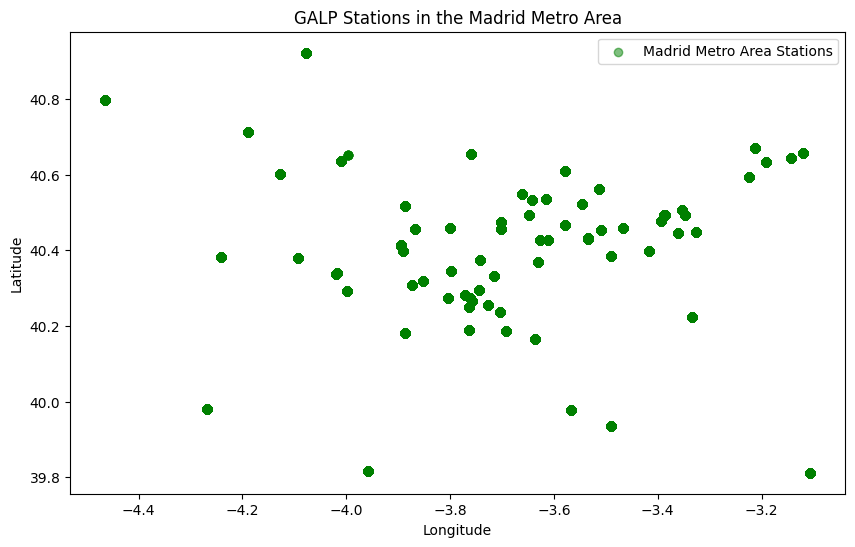

In [17]:
import matplotlib.pyplot as plt

# Plot stations in the Madrid Metro Area
plt.figure(figsize=(10, 6))
plt.scatter(madrid_metro_stations['longitude'], madrid_metro_stations['latitude'], alpha=0.5, color='green', label='Madrid Metro Area Stations')
plt.title('GALP Stations in the Madrid Metro Area')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()


In [18]:
# Define updated bounds for the Madrid Metro Area
latitude_bounds = (39.8, 41.2)  # Latitude range
longitude_bounds = (-4.5, -2.5)  # Longitude range



In [19]:
# Filter all stations within the specified bounds
madrid_metro_all_stations = data[
    (data['latitude'] >= latitude_bounds[0]) &
    (data['latitude'] <= latitude_bounds[1]) &
    (data['longitude'] >= longitude_bounds[0]) &
    (data['longitude'] <= longitude_bounds[1])
]

# Display the first few rows
print(madrid_metro_all_stations[['name', 'region_name', 'municipality_name', 'longitude', 'latitude']].head())


           name         region_name    municipality_name  longitude   latitude
37   STORE FUEL              Madrid    Torrejón de Ardoz  -3.461778  40.455806
39    BALLENOIL              Madrid    Daganzo de Arriba  -3.463556  40.541000
44         GALP              Madrid            Valdemoro  -3.692694  40.185500
100      REPSOL  Castilla la Mancha             Illescas  -3.846250  40.126306
109       CEPSA              Madrid  Torrejón de Velasco  -3.725222  40.182444


C:\Users\azmyn\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


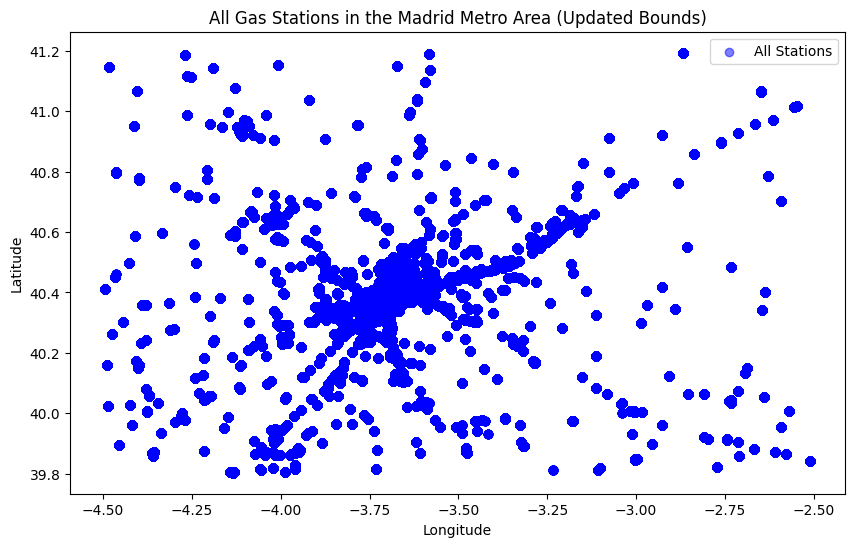

In [20]:


# Plot all stations
plt.figure(figsize=(10, 6))
plt.scatter(
    madrid_metro_all_stations['longitude'],
    madrid_metro_all_stations['latitude'],
    alpha=0.5,
    color='blue',
    label='All Stations'
)

# Add titles and labels
plt.title('All Gas Stations in the Madrid Metro Area (Updated Bounds)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()


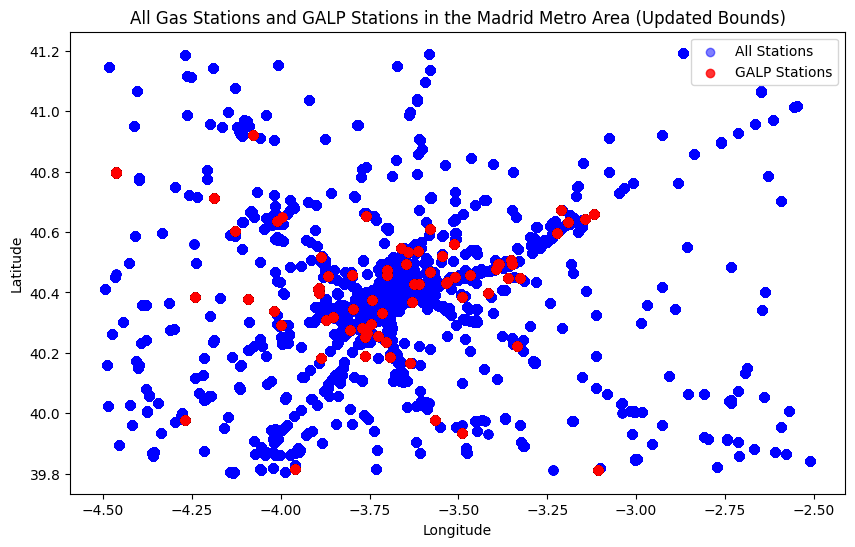

In [21]:
# Filter GALP stations within the specified bounds
galp_madrid_metro_stations = galp_stations[
    (galp_stations['latitude'] >= latitude_bounds[0]) &
    (galp_stations['latitude'] <= latitude_bounds[1]) &
    (galp_stations['longitude'] >= longitude_bounds[0]) &
    (galp_stations['longitude'] <= longitude_bounds[1])
]

# Plot all stations and overlay GALP stations
plt.figure(figsize=(10, 6))
plt.scatter(
    madrid_metro_all_stations['longitude'],
    madrid_metro_all_stations['latitude'],
    alpha=0.5,
    color='blue',
    label='All Stations'
)
plt.scatter(
    galp_madrid_metro_stations['longitude'],
    galp_madrid_metro_stations['latitude'],
    alpha=0.8,
    color='red',
    label='GALP Stations'
)

# Add titles and labels
plt.title('All Gas Stations and GALP Stations in the Madrid Metro Area (Updated Bounds)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()


In [22]:
!python -m pip install plotly
!python -m pip install --upgrade nbformat

In [23]:
print(madrid_stations['name'].unique())


['GALP' 'GALP&GO']


In [24]:
# Define a mapping of keywords to major brands
brand_mapping = {
    "GALP": "GALP",
    "SHELL": "SHELL",
    "REPSOL": "REPSOL",
    "BP": "BP",
    "CEPSA": "CEPSA",
    "Q8": "Q8",
    "TOTAL": "TOTAL",
    "AVIA": "AVIA",
    # Add more as needed
}

# Function to map names to brands
def map_brand(name):
    for keyword, brand in brand_mapping.items():
        if keyword in name.upper():  # Convert to uppercase for case-insensitive matching
            return brand
    return "OTHER"  # Default category for unrecognized stations



In [25]:
# Use the original dataset (e.g., 'data') for all stations
all_stations = data.copy()

# Apply the brand mapping to the unfiltered dataset
all_stations['brand'] = all_stations['name'].apply(map_brand)

# Display unique brands and first few rows
print(all_stations['brand'].unique())
print(all_stations[['name', 'brand']].head())



['OTHER' 'CEPSA' 'GALP' 'SHELL' 'REPSOL' 'BP' 'AVIA' 'Q8' 'TOTAL']
                                   name  brand
0                                  ALSA  OTHER
1  COOP. Nª Sª DE LA ASUNCION DE SONEJA  OTHER
2                                 CEPSA  CEPSA
3     ESTACION DE SERVICIO VICASOL S.L.  OTHER
4                                  AGLA  OTHER


In [26]:
# Filter for stations in Madrid area
madrid_stations_all = all_stations[
    (all_stations['region_name'].str.contains('Madrid', case=False, na=False)) |
    (all_stations['municipality_name'].str.contains('Madrid', case=False, na=False)) |
    (all_stations['town'].str.contains('Madrid', case=False, na=False))
]

# Count the number of stations by brand
brand_counts_madrid = madrid_stations_all['brand'].value_counts()
print(brand_counts_madrid)


brand
REPSOL    1348806
CEPSA      800360
OTHER      692311
BP         436620
GALP       288843
SHELL      287151
AVIA        22384
Q8          20057
Name: count, dtype: int64


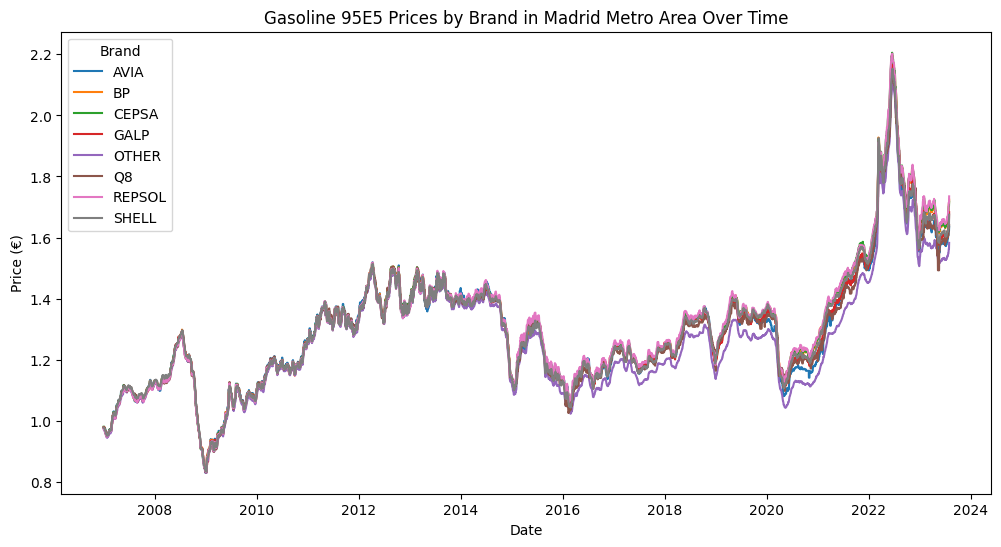

In [27]:

# Group by date and brand for average price trends
price_trends = madrid_stations_all.groupby(['date', 'brand'])['gasoline_95E5'].mean().reset_index()

# Plot price trends for each brand
plt.figure(figsize=(12, 6))
for brand in price_trends['brand'].unique():
    brand_data = price_trends[price_trends['brand'] == brand]
    plt.plot(brand_data['date'], brand_data['gasoline_95E5'], label=brand)

plt.title('Gasoline 95E5 Prices by Brand in Madrid Metro Area Over Time')
plt.xlabel('Date')
plt.ylabel('Price (€)')
plt.legend(title='Brand')
plt.show()


In [28]:
from datetime import datetime

# Filter for data from the last year (adjust as needed)
recent_date = madrid_stations_all['date'].max()
one_year_ago = recent_date - pd.DateOffset(years=1)
recent_data = madrid_stations_all[madrid_stations_all['date'] >= one_year_ago]


In [29]:
# Aggregate by month-year and brand
recent_data['month_year'] = recent_data['date'].dt.to_period('M')
avg_price_by_month = recent_data.groupby(['month_year', 'brand'])['gasoline_95E5'].mean().reset_index()


C:\Users\azmyn\AppData\Local\Temp\ipykernel_21124\237773634.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recent_data['month_year'] = recent_data['date'].dt.to_period('M')


C:\Users\azmyn\AppData\Local\Temp\ipykernel_21124\3714879577.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=recent_data, x='brand', y='gasoline_95E5', palette='coolwarm')


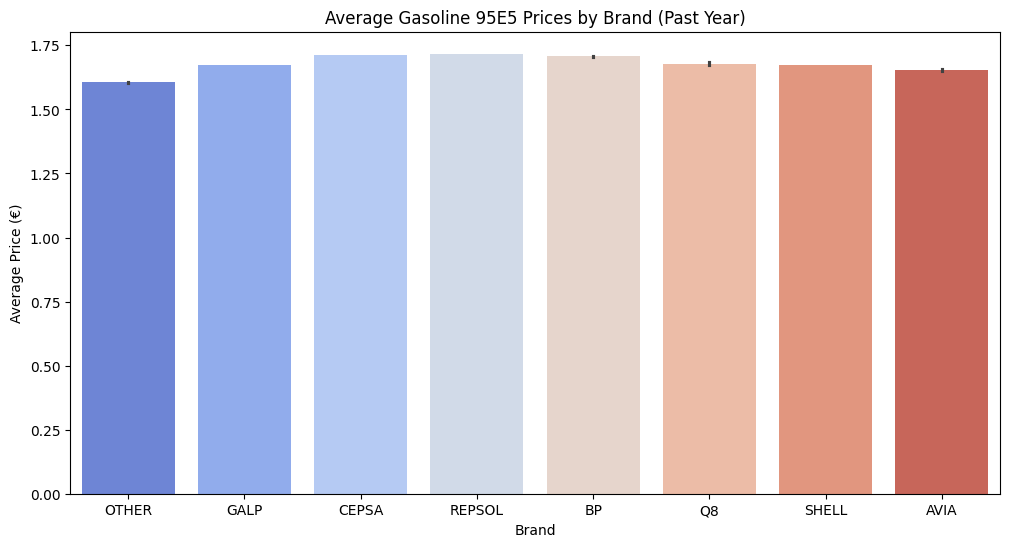

In [30]:
import seaborn as sns
# Plot recent averages by brand
plt.figure(figsize=(12, 6))
sns.barplot(data=recent_data, x='brand', y='gasoline_95E5', palette='coolwarm')
plt.title('Average Gasoline 95E5 Prices by Brand (Past Year)')
plt.xlabel('Brand')
plt.ylabel('Average Price (€)')
plt.show()


In [31]:
print(madrid_stations_all['gasoline_95E5'].dtype)


object


In [32]:
!python -m pip install statsmodels


In [33]:
shell_data = madrid_stations_all[madrid_stations_all['brand'] == 'SHELL']


In [34]:
print(shell_data['gasoline_95E5'].unique())  # Check for unexpected or non-numeric values


[Decimal('1.489000000') Decimal('1.709000000') Decimal('1.744000000')
 Decimal('1.704000000') Decimal('1.724000000') Decimal('1.689000000')
 Decimal('1.684000000') Decimal('1.549000000') Decimal('1.649000000')
 Decimal('1.714000000') Decimal('1.669000000') Decimal('1.729000000')
 Decimal('1.749000000') Decimal('1.609000000') Decimal('1.694000000')
 Decimal('1.659000000') Decimal('1.599000000') Decimal('1.639000000')
 Decimal('1.619000000') Decimal('1.699000000') Decimal('1.739000000')
 Decimal('1.719000000') Decimal('1.679000000') Decimal('1.519000000')
 Decimal('1.664000000') Decimal('1.644000000') Decimal('1.569000000')
 Decimal('1.469000000') Decimal('1.589000000') Decimal('1.629000000')
 Decimal('1.594000000') Decimal('1.529000000') Decimal('1.674000000')
 Decimal('1.499000000') Decimal('1.579000000') Decimal('1.654000000')
 Decimal('1.459000000') Decimal('1.564000000') Decimal('1.624000000')
 Decimal('1.574000000') Decimal('1.479000000') Decimal('1.634000000')
 Decimal('1.55400000

In [35]:
shell_data['gasoline_95E5'] = pd.to_numeric(shell_data['gasoline_95E5'], errors='coerce')
shell_data['gasoline_95E5'] = shell_data['gasoline_95E5'].fillna(shell_data['gasoline_95E5'].mean())



C:\Users\azmyn\AppData\Local\Temp\ipykernel_21124\3398852744.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shell_data['gasoline_95E5'] = pd.to_numeric(shell_data['gasoline_95E5'], errors='coerce')
C:\Users\azmyn\AppData\Local\Temp\ipykernel_21124\3398852744.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shell_data['gasoline_95E5'] = shell_data['gasoline_95E5'].fillna(shell_data['gasoline_95E5'].mean())


In [36]:
print(shell_data['gasoline_95E5'].dtype)  # Should show 'float64' or 'int64'


float64


In [37]:
shell_data = shell_data.sort_values('date')


In [38]:
import numpy as np
shell_data['gasoline_95E5'] = pd.to_numeric(shell_data['gasoline_95E5'], errors='coerce')
shell_data['gasoline_95E5'] = shell_data['gasoline_95E5'].fillna(shell_data['gasoline_95E5'].mean())
gas_prices = np.array(shell_data['gasoline_95E5'])



In [39]:
shell_data = shell_data.sort_values('date')
print(type(gas_prices))  # Should be <class 'numpy.ndarray'>
print(gas_prices.dtype)  # Should be 'float64'


<class 'numpy.ndarray'>
float64


In [40]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model = ExponentialSmoothing(gas_prices, seasonal='add', seasonal_periods=12)
fit = model.fit()
forecast = fit.forecast(6)
print("Forecasted Prices:", forecast)




Forecasted Prices: [1.66229826 1.66203835 1.66222006 1.66211011 1.66255199 1.66238332]


In [41]:
print(madrid_stations_all.columns)


Index(['station_id', 'date', 'gasoline_95E5', 'gasoline_95E5_premium',
       'gasoline_95E10', 'gasoline_98E5', 'gasoline_98E10', 'diesel_A',
       'diesel_B', 'diesel_premium', 'bioetanol', 'biodiesel', 'lpg', 'cng',
       'lng', 'hydrogen', 'name', 'address', 'town', 'zip_code', 'longitude',
       'latitude', 'road_side', 'restriction', 'sender', 'schedule',
       'region_id', 'region_name', 'province_id', 'province_name',
       'municipality_id', 'municipality_name', 'brand'],
      dtype='object')


In [42]:
brand_data['gasoline_95E5'] = pd.to_numeric(brand_data['gasoline_95E5'], errors='coerce')
print(brand_data['gasoline_95E5'].dtype)  # Confirm the type is now float64
print(brand_data['gasoline_95E5'].isnull().sum())  # Check for any NaNs after coercion


float64
0


C:\Users\azmyn\AppData\Local\Temp\ipykernel_21124\4233722143.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand_data['gasoline_95E5'] = pd.to_numeric(brand_data['gasoline_95E5'], errors='coerce')


In [43]:
print(brand_data['gasoline_95E5'].dtype)  # Should be float64
print(brand_data['gasoline_95E5'].isnull().sum())  # Should be 0


float64
0


In [44]:
# Select one GALP and one SHELL station with sufficient data
galp_station = madrid_stations_all[(madrid_stations_all['brand'] == 'GALP')].groupby('name').filter(lambda x: len(x) > 24)
shell_station = madrid_stations_all[(madrid_stations_all['brand'] == 'SHELL')].groupby('name').filter(lambda x: len(x) > 24)

# Check records
print("GALP station records:", len(galp_station))
print("SHELL station records:", len(shell_station))


GALP station records: 288843
SHELL station records: 287151


In [45]:
# Filter GALP and SHELL stations within a reasonable geographic area
filtered_galp = madrid_stations_all[
    (madrid_stations_all['brand'] == 'GALP') &
    (madrid_stations_all['latitude'] >= 40.4) & (madrid_stations_all['latitude'] <= 40.5) &
    (madrid_stations_all['longitude'] >= -3.8) & (madrid_stations_all['longitude'] <= -3.7)
]

filtered_shell = madrid_stations_all[
    (madrid_stations_all['brand'] == 'SHELL') &
    (madrid_stations_all['latitude'] >= 40.4) & (madrid_stations_all['latitude'] <= 40.5) &
    (madrid_stations_all['longitude'] >= -3.8) & (madrid_stations_all['longitude'] <= -3.7)
]

# Select one GALP and one SHELL station
galp_station = filtered_galp.iloc[0]
shell_station = filtered_shell.iloc[0]

# Print the selected stations
print("Selected GALP station:")
print(galp_station[['name', 'latitude', 'longitude']])

print("\nSelected SHELL station:")
print(shell_station[['name', 'latitude', 'longitude']])


Selected GALP station:
name              GALP
latitude     40.473722
longitude    -3.701361
Name: 4527, dtype: object

Selected SHELL station:
name          SHELL
latitude      40.43
longitude   -3.7085
Name: 4496, dtype: object


In [46]:
# Filter historical data for the selected stations
galp_prices = madrid_stations_all[
    (madrid_stations_all['brand'] == 'GALP') &
    (madrid_stations_all['latitude'] == galp_station['latitude']) &
    (madrid_stations_all['longitude'] == galp_station['longitude'])
]

shell_prices = madrid_stations_all[
    (madrid_stations_all['brand'] == 'SHELL') &
    (madrid_stations_all['latitude'] == shell_station['latitude']) &
    (madrid_stations_all['longitude'] == shell_station['longitude'])
]


C:\Users\azmyn\AppData\Local\Temp\ipykernel_21124\503330312.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  galp_prices['date'] = pd.to_datetime(galp_prices['date'])
C:\Users\azmyn\AppData\Local\Temp\ipykernel_21124\503330312.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shell_prices['date'] = pd.to_datetime(shell_prices['date'])


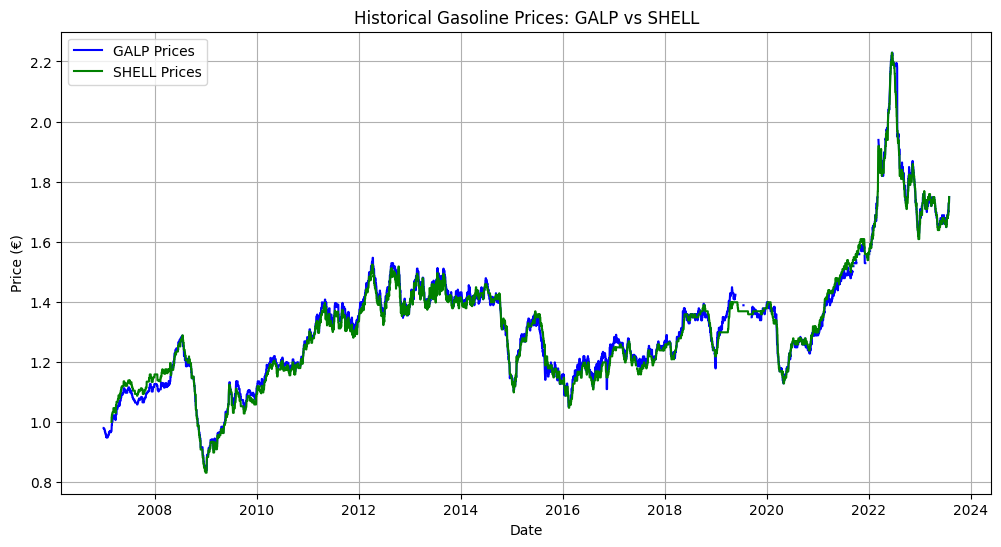

In [47]:
import matplotlib.pyplot as plt

# Convert dates to datetime format
galp_prices['date'] = pd.to_datetime(galp_prices['date'])
shell_prices['date'] = pd.to_datetime(shell_prices['date'])

# Plot the price trends
plt.figure(figsize=(12, 6))
plt.plot(galp_prices['date'], galp_prices['gasoline_95E5'], label='GALP Prices', color='blue')
plt.plot(shell_prices['date'], shell_prices['gasoline_95E5'], label='SHELL Prices', color='green')

# Add labels and legend
plt.title("Historical Gasoline Prices: GALP vs SHELL")
plt.xlabel("Date")
plt.ylabel("Price (€)")
plt.legend()
plt.grid(True)
plt.show()


GALP Station Records: 6034
SHELL Station Records: 5984


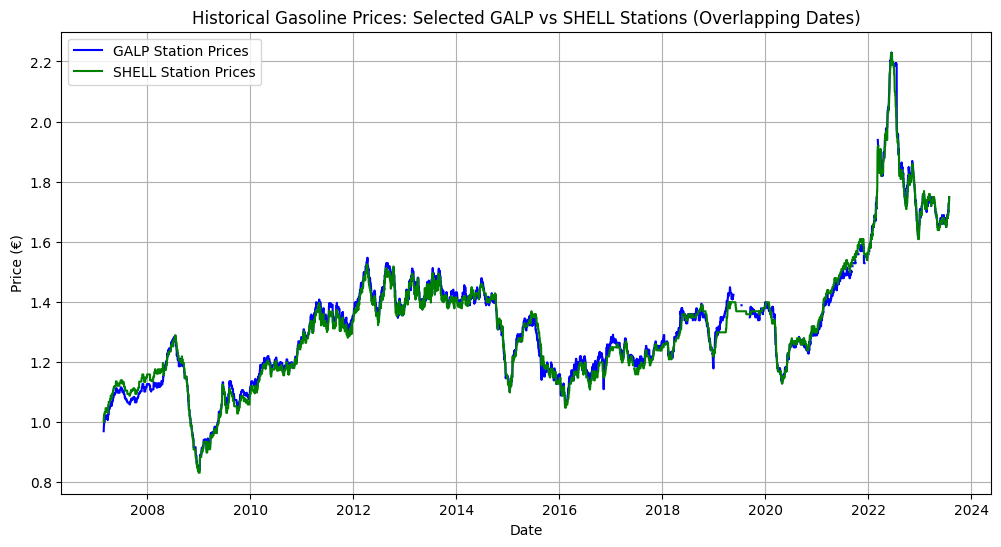

In [48]:
# Check data availability for both stations
print("GALP Station Records:", len(galp_prices))
print("SHELL Station Records:", len(shell_prices))

# Find overlapping date range
common_dates = set(galp_prices['date']).intersection(set(shell_prices['date']))
if len(common_dates) == 0:
    print("No overlapping dates between GALP and SHELL stations.")
else:
    # Filter data to overlapping dates
    galp_prices_filtered = galp_prices[galp_prices['date'].isin(common_dates)]
    shell_prices_filtered = shell_prices[shell_prices['date'].isin(common_dates)]

    # Plot the filtered data
    plt.figure(figsize=(12, 6))
    plt.plot(galp_prices_filtered['date'], galp_prices_filtered['gasoline_95E5'], label='GALP Station Prices', color='blue')
    plt.plot(shell_prices_filtered['date'], shell_prices_filtered['gasoline_95E5'], label='SHELL Station Prices', color='green')

    # Add labels, legend, and grid
    plt.title("Historical Gasoline Prices: Selected GALP vs SHELL Stations (Overlapping Dates)")
    plt.xlabel("Date")
    plt.ylabel("Price (€)")
    plt.legend()
    plt.grid(True)
    plt.show()




In [49]:
# Filter for stations with sufficient records
galp_station_data = madrid_stations_all[
    (madrid_stations_all['brand'] == 'GALP') & (madrid_stations_all['name'] == 'Selected GALP Station')
]
shell_station_data = madrid_stations_all[
    (madrid_stations_all['brand'] == 'SHELL') & (madrid_stations_all['name'] == 'Selected SHELL Station')
]

print("GALP Records:", len(galp_station_data))
print("SHELL Records:", len(shell_station_data))


GALP Records: 0
SHELL Records: 0


In [50]:
galp_station = madrid_stations_all[
    (madrid_stations_all['brand'] == 'GALP')
].groupby('name').filter(lambda x: len(x) > 24)

shell_station = madrid_stations_all[
    (madrid_stations_all['brand'] == 'SHELL')
].groupby('name').filter(lambda x: len(x) > 24)


In [51]:
print(galp_station['name'].unique())
print(shell_station['name'].unique())


['GALP' 'GALP&GO']
['SHELL' 'SHELL ATALAYUELA 365']


In [52]:
selected_galp_station = galp_station[galp_station['name'] == 'Specific GALP Station']
selected_shell_station = shell_station[shell_station['name'] == 'Specific SHELL Station']


0
0


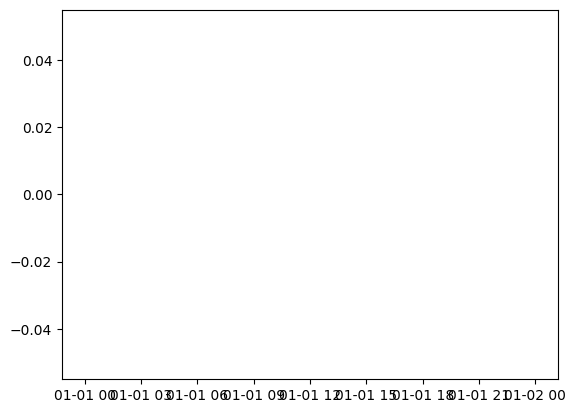

In [53]:
plt.plot(selected_galp_station['date'], selected_galp_station['gasoline_95E5'], label="GALP Prices")
print(selected_galp_station['gasoline_95E5'].isnull().sum())
print(selected_shell_station['gasoline_95E5'].isnull().sum())



In [54]:
print(selected_galp_station.shape)
print(selected_shell_station.shape)


(0, 33)
(0, 33)


In [55]:
!python -m pip install geopy


Selected GALP Station: GALP
Selected SHELL Station: SHELL


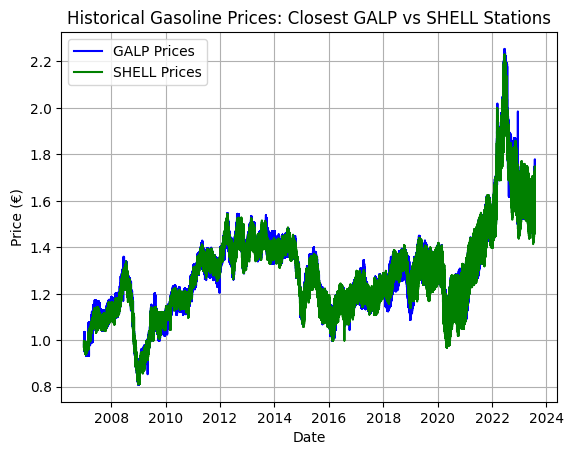

In [56]:
from geopy.distance import geodesic

# Step 1: Filter for Madrid stations
madrid_galp = madrid_stations_all[madrid_stations_all['brand'] == 'GALP']
madrid_shell = madrid_stations_all[madrid_stations_all['brand'] == 'SHELL']

# Step 2: Group by station name and count records
galp_station_counts = madrid_galp.groupby('name').size().reset_index(name='count')
shell_station_counts = madrid_shell.groupby('name').size().reset_index(name='count')

# Step 3: Merge station info with counts
galp_stations_with_data = pd.merge(madrid_galp[['name', 'latitude', 'longitude']].drop_duplicates(), galp_station_counts, on='name')
shell_stations_with_data = pd.merge(madrid_shell[['name', 'latitude', 'longitude']].drop_duplicates(), shell_station_counts, on='name')

# Step 4: Identify closest stations
closest_stations = []
for _, galp_row in galp_stations_with_data.iterrows():
    galp_coords = (galp_row['latitude'], galp_row['longitude'])
    for _, shell_row in shell_stations_with_data.iterrows():
        shell_coords = (shell_row['latitude'], shell_row['longitude'])
        distance = geodesic(galp_coords, shell_coords).kilometers
        closest_stations.append({
            'galp_name': galp_row['name'],
            'shell_name': shell_row['name'],
            'galp_lat': galp_row['latitude'],
            'galp_lon': galp_row['longitude'],
            'shell_lat': shell_row['latitude'],
            'shell_lon': shell_row['longitude'],
            'distance': distance,
            'galp_count': galp_row['count'],
            'shell_count': shell_row['count']
        })

# Convert to DataFrame
closest_stations_df = pd.DataFrame(closest_stations)

# Step 5: Select the closest pair with the most data
selected_pair = closest_stations_df.sort_values(by=['distance', 'galp_count', 'shell_count']).iloc[0]
print("Selected GALP Station:", selected_pair['galp_name'])
print("Selected SHELL Station:", selected_pair['shell_name'])

# Step 6: Filter data for the selected stations
selected_galp_station = madrid_galp[madrid_galp['name'] == selected_pair['galp_name']]
selected_shell_station = madrid_shell[madrid_shell['name'] == selected_pair['shell_name']]

# Step 7: Plot the historical prices
import matplotlib.pyplot as plt

plt.plot(selected_galp_station['date'], selected_galp_station['gasoline_95E5'], label="GALP Prices", color="blue")
plt.plot(selected_shell_station['date'], selected_shell_station['gasoline_95E5'], label="SHELL Prices", color="green")
plt.legend()
plt.title("Historical Gasoline Prices: Closest GALP vs SHELL Stations")
plt.xlabel("Date")
plt.ylabel("Price (€)")
plt.grid(True)
plt.show()


In [57]:
# Pivot the data to create a table where each column is a brand and rows are dates
price_pivot = price_trends.pivot(index='date', columns='brand', values='gasoline_95E5')

# Calculate price differences between GALP and competitors
# Step 1: Calculate Price Differences
# Assuming price_pivot contains all brands
price_pivot['GALP_vs_SHELL'] = price_pivot['GALP'] - price_pivot['SHELL']
price_pivot['GALP_vs_REPSOL'] = price_pivot['GALP'] - price_pivot['REPSOL']
price_pivot['GALP_vs_BP'] = price_pivot['GALP'] - price_pivot['BP']
price_pivot['GALP_vs_CEPSA'] = price_pivot['GALP'] - price_pivot['CEPSA']
price_pivot['GALP_vs_AVIA'] = price_pivot['GALP'] - price_pivot['AVIA']
price_pivot['GALP_vs_Q8'] = price_pivot['GALP'] - price_pivot['Q8']

# Reset the index for plotting
price_differences = price_pivot.reset_index()

# Display the resulting DataFrame
price_differences.head()

# Reset the index to prepare for plotting
price_differences = price_pivot.reset_index()

# Display the resulting DataFrame
price_differences.head()

brand,date,AVIA,BP,CEPSA,GALP,OTHER,Q8,REPSOL,SHELL,GALP_vs_SHELL,GALP_vs_REPSOL,GALP_vs_BP,GALP_vs_CEPSA,GALP_vs_AVIA,GALP_vs_Q8
0,2007-01-01,0.978,0.977367,0.980938,0.979897,0.973383,0.977,0.975685,0.978714,0.001182,0.004212,0.002529,-0.001042,0.001897,0.002897
1,2007-01-02,0.978,0.977286,0.981137,0.98031,0.973426,0.977,0.975342,0.978048,0.002263,0.004969,0.003025,-0.000826,0.00231,0.00331
2,2007-01-03,0.978,0.977375,0.981086,0.978036,0.973973,0.977,0.976024,0.97805,-0.000014,0.002012,0.000661,-0.00305,0.000036,0.001036
3,2007-01-04,0.978,0.977375,0.981086,0.978036,0.97273,0.977,0.975821,0.97755,0.000486,0.002214,0.000661,-0.00305,0.000036,0.001036
4,2007-01-05,0.978,0.977292,0.981204,0.979357,0.971649,0.977,0.975452,0.97675,0.002607,0.003905,0.002065,-0.001847,0.001357,0.002357


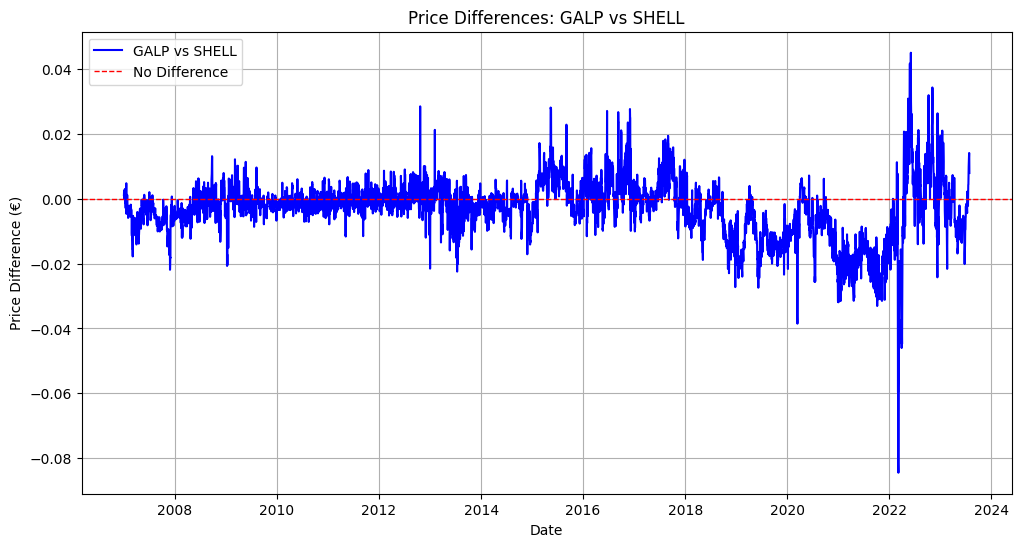

In [58]:
# Plot GALP vs SHELL
plt.figure(figsize=(12, 6))
plt.plot(price_differences['date'], price_differences['GALP_vs_SHELL'], label="GALP vs SHELL", color="blue")
plt.axhline(y=0, color='red', linestyle='--', linewidth=1, label="No Difference")
plt.title("Price Differences: GALP vs SHELL")
plt.xlabel("Date")
plt.ylabel("Price Difference (€)")
plt.legend()
plt.grid(True)
plt.show()

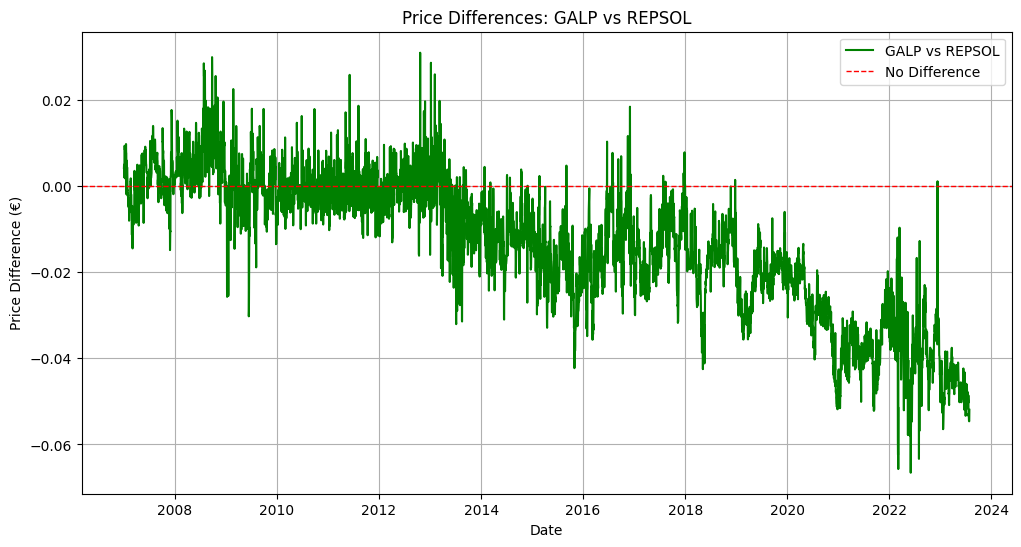

In [59]:
# Plot GALP vs REPSOL
plt.figure(figsize=(12, 6))
plt.plot(price_differences['date'], price_differences['GALP_vs_REPSOL'], label="GALP vs REPSOL", color="green")
plt.axhline(y=0, color='red', linestyle='--', linewidth=1, label="No Difference")
plt.title("Price Differences: GALP vs REPSOL")
plt.xlabel("Date")
plt.ylabel("Price Difference (€)")
plt.legend()
plt.grid(True)
plt.show()


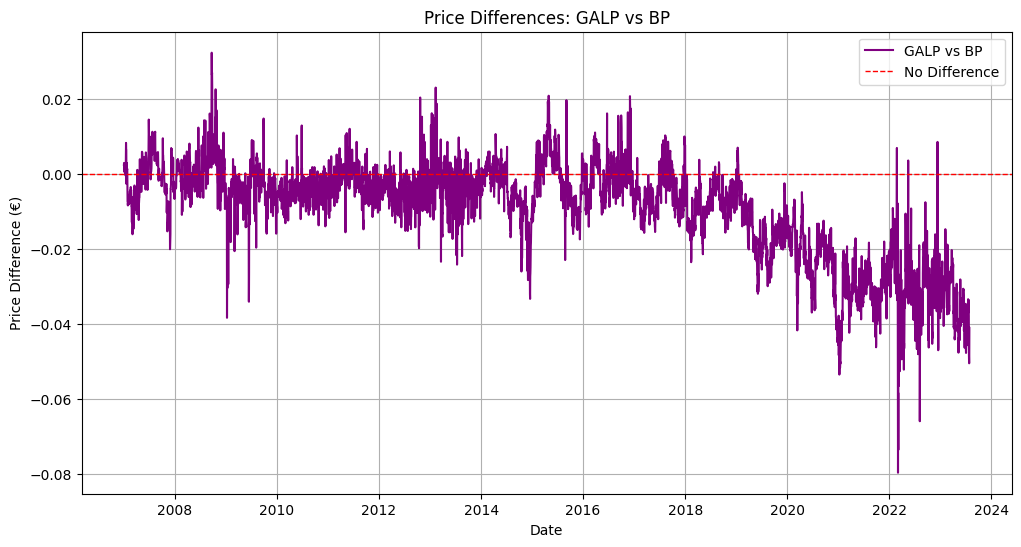

In [60]:
# Plot GALP vs BP
plt.figure(figsize=(12, 6))
plt.plot(price_differences['date'], price_differences['GALP_vs_BP'], label="GALP vs BP", color="purple")
plt.axhline(y=0, color='red', linestyle='--', linewidth=1, label="No Difference")
plt.title("Price Differences: GALP vs BP")
plt.xlabel("Date")
plt.ylabel("Price Difference (€)")
plt.legend()
plt.grid(True)
plt.show()


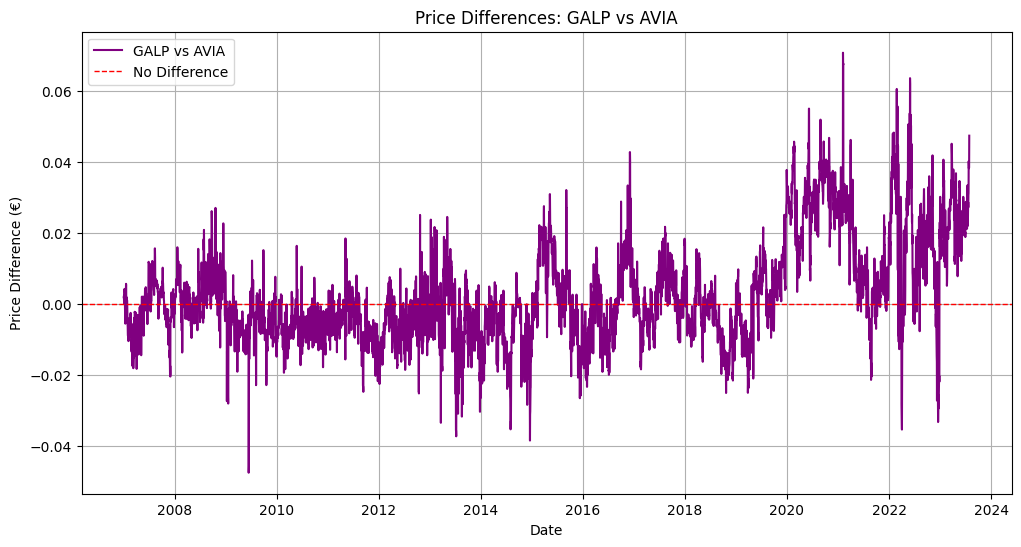

In [61]:
# Plot GALP vs AVIA
plt.figure(figsize=(12, 6))
plt.plot(price_differences['date'], price_differences['GALP'] - price_differences['AVIA'], label="GALP vs AVIA", color="purple")
plt.axhline(y=0, color='red', linestyle='--', linewidth=1, label="No Difference")
plt.title("Price Differences: GALP vs AVIA")
plt.xlabel("Date")
plt.ylabel("Price Difference (€)")
plt.legend()
plt.grid(True)
plt.show()


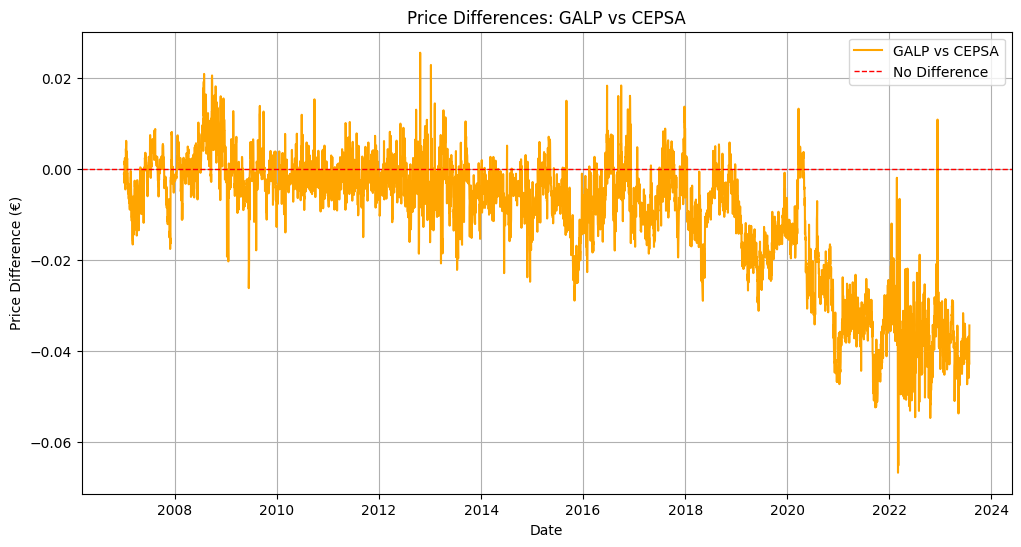

In [62]:
# Plot GALP vs CEPSA
plt.figure(figsize=(12, 6))
plt.plot(price_differences['date'], price_differences['GALP'] - price_differences['CEPSA'], label="GALP vs CEPSA", color="orange")
plt.axhline(y=0, color='red', linestyle='--', linewidth=1, label="No Difference")
plt.title("Price Differences: GALP vs CEPSA")
plt.xlabel("Date")
plt.ylabel("Price Difference (€)")
plt.legend()
plt.grid(True)
plt.show()


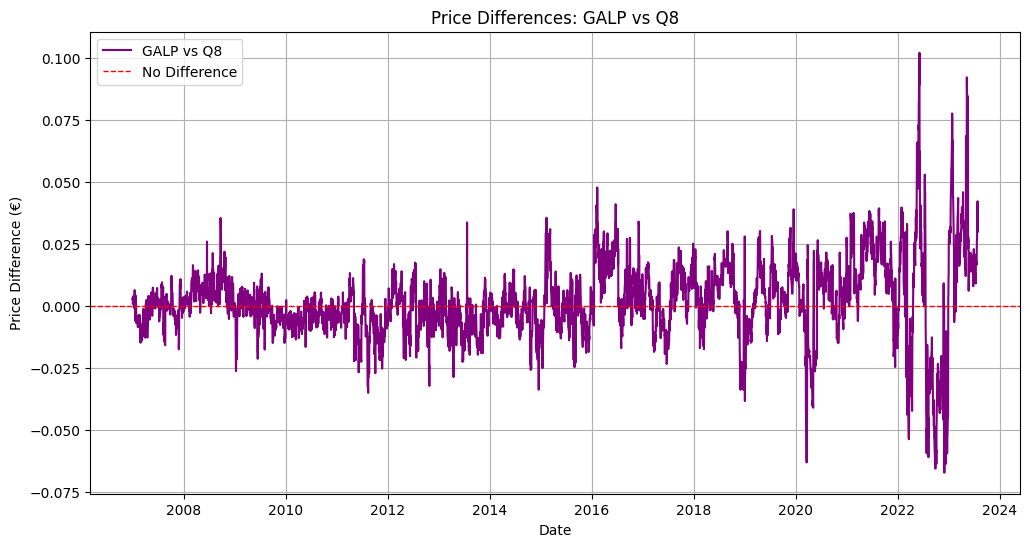

In [63]:
# Plot GALP vs Q8
plt.figure(figsize=(12, 6))
plt.plot(price_differences['date'], price_differences['GALP'] - price_differences['Q8'], label="GALP vs Q8", color="purple")
plt.axhline(y=0, color='red', linestyle='--', linewidth=1, label="No Difference")
plt.title("Price Differences: GALP vs Q8")
plt.xlabel("Date")
plt.ylabel("Price Difference (€)")
plt.legend()
plt.grid(True)
plt.show()



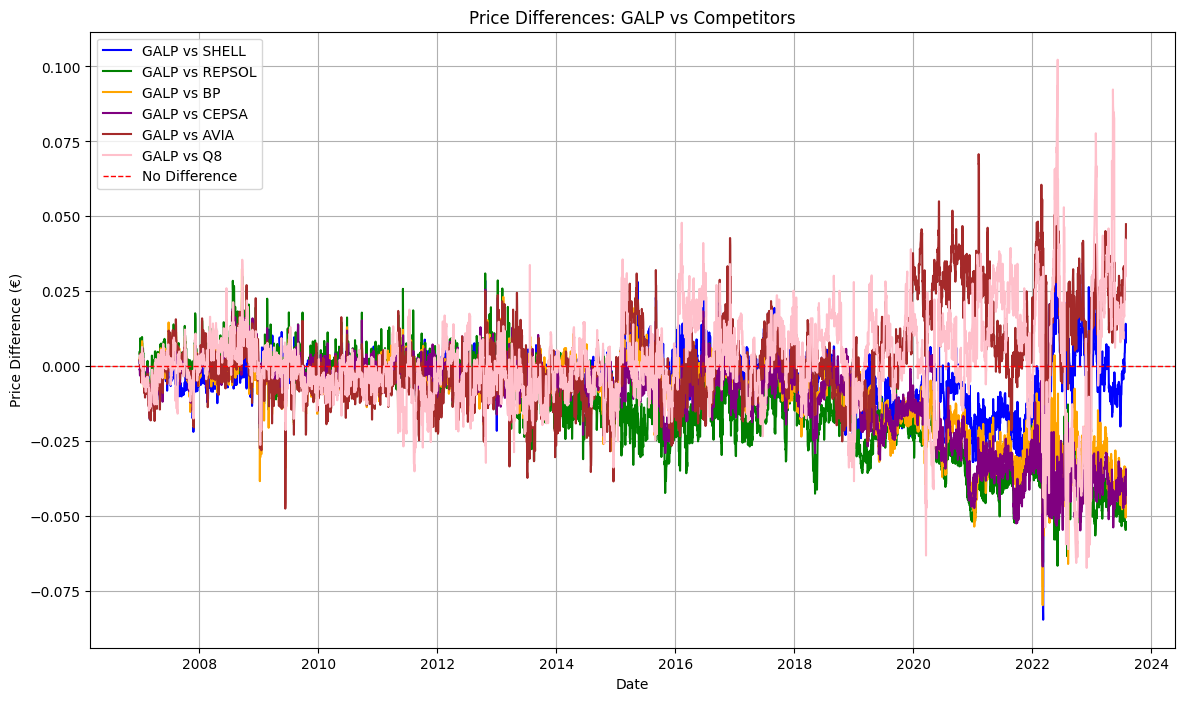

In [64]:
# Plot all GALP vs other brands in a single plot
plt.figure(figsize=(14, 8))

# Plot GALP vs each competitor
plt.plot(price_differences['date'], price_differences['GALP'] - price_differences['SHELL'], label="GALP vs SHELL", color="blue")
plt.plot(price_differences['date'], price_differences['GALP'] - price_differences['REPSOL'], label="GALP vs REPSOL", color="green")
plt.plot(price_differences['date'], price_differences['GALP'] - price_differences['BP'], label="GALP vs BP", color="orange")
plt.plot(price_differences['date'], price_differences['GALP'] - price_differences['CEPSA'], label="GALP vs CEPSA", color="purple")
plt.plot(price_differences['date'], price_differences['GALP'] - price_differences['AVIA'], label="GALP vs AVIA", color="brown")
plt.plot(price_differences['date'], price_differences['GALP'] - price_differences['Q8'], label="GALP vs Q8", color="pink")

# Add horizontal line at 0 for reference
plt.axhline(y=0, color='red', linestyle='--', linewidth=1, label="No Difference")

# Add title, labels, legend, and grid
plt.title("Price Differences: GALP vs Competitors")
plt.xlabel("Date")
plt.ylabel("Price Difference (€)")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


In [65]:
# Step 1: Mean and Standard Deviation Analysis
stats = {}
for column in ['GALP_vs_SHELL', 'GALP_vs_REPSOL', 'GALP_vs_BP', 'GALP_vs_CEPSA', 'GALP_vs_AVIA', 'GALP_vs_Q8']:
    stats[column] = {
        'mean': price_differences[column].mean(),
        'std_dev': price_differences[column].std()
    }

# Convert stats dictionary to a DataFrame for better visualization
import pandas as pd
stats_df = pd.DataFrame(stats).T
stats_df.columns = ['Mean', 'Standard Deviation']

# Display the stats DataFrame in your notebook
print(stats_df)



                    Mean  Standard Deviation
GALP_vs_SHELL  -0.003099            0.009024
GALP_vs_REPSOL -0.013697            0.016021
GALP_vs_BP     -0.009297            0.012920
GALP_vs_CEPSA  -0.010589            0.014008
GALP_vs_AVIA    0.002433            0.014205
GALP_vs_Q8      0.001690            0.015695


The statistical analysis of price differences between GALP and its competitors reveals key insights into their pricing strategies. The mean price differences indicate whether GALP's prices are generally higher or lower compared to each competitor over time, with negative means suggesting that GALP tends to price lower than competitors on average. The standard deviation, on the other hand, measures the variability in these price differences, providing insights into the stability of GALP's pricing strategy relative to competitors. A low standard deviation reflects consistent pricing, while a high standard deviation indicates fluctuations. These metrics allow for deeper understanding of market dynamics and competitive behavior, which are essential for predicting competitor actions and optimizing pricing strategies.

In [66]:
correlations = price_differences.corr()
print(correlations)


brand               date      AVIA        BP     CEPSA      GALP     OTHER  \
brand                                                                        
date            1.000000  0.578510  0.627299  0.629741  0.603309  0.505673   
AVIA            0.578510  1.000000  0.995287  0.994973  0.997563  0.994600   
BP              0.627299  0.995287  1.000000  0.999552  0.998547  0.986222   
CEPSA           0.629741  0.994973  0.999552  1.000000  0.998524  0.985481   
GALP            0.603309  0.997563  0.998547  0.998524  1.000000  0.991361   
OTHER           0.505673  0.994600  0.986222  0.985481  0.991361  1.000000   
Q8              0.589880  0.996105  0.995339  0.994898  0.996908  0.992580   
REPSOL          0.643358  0.993870  0.998945  0.999433  0.997879  0.982899   
SHELL           0.612602  0.996708  0.998892  0.998733  0.998983  0.989091   
GALP_vs_SHELL  -0.228703 -0.018532 -0.045172 -0.042144 -0.015019  0.013079   
GALP_vs_REPSOL -0.858106 -0.508261 -0.562096 -0.568732 -0.530086

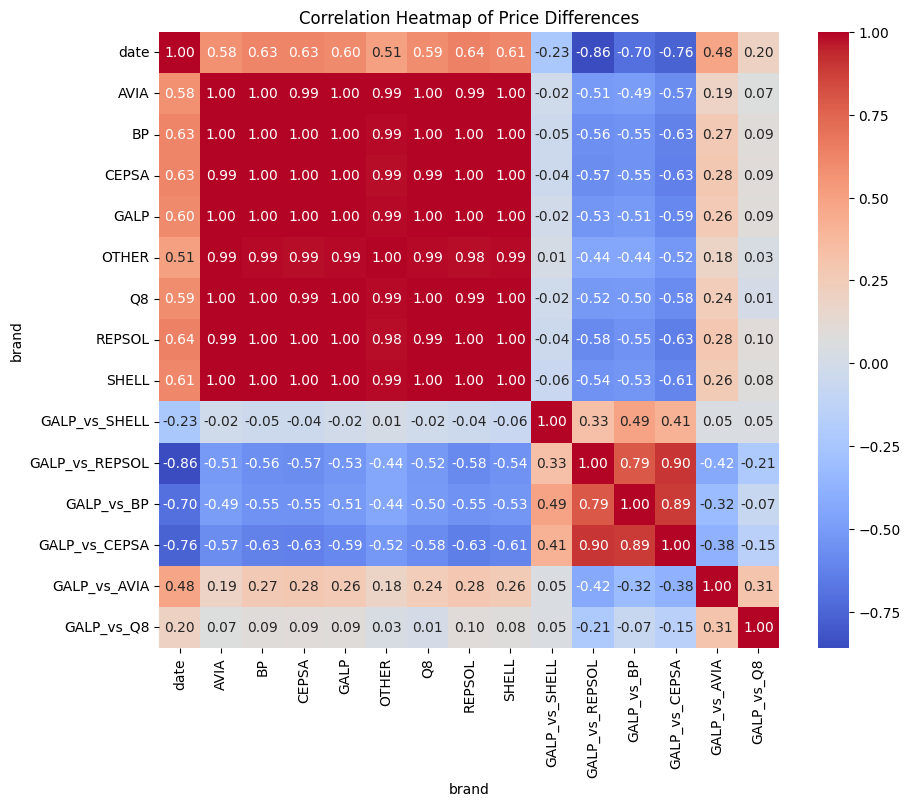

In [67]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Price Differences")
plt.show()

This heatmap reveals how GALP aligns or diverges its pricing strategy compared to its competitors. The strong correlations between competitors like BP, SHELL, and REPSOL suggest a market-driven dynamic where pricing strategies are tightly coupled. In contrast, negative correlations with GALP’s pricing differences highlight the unique positioning of GALP's strategy against some brands (e.g., REPSOL) while maintaining closer alignment with others (e.g., SHELL).

This analysis can guide GALP in identifying key competitors whose pricing moves have the most impact on its market positioning, allowing better strategic alignment or differentiation.

In [68]:
# Plot yearly mean price differences for GALP vs competitors only
columns_to_plot = ['GALP_vs_SHELL', 'GALP_vs_REPSOL', 'GALP_vs_BP', 'GALP_vs_CEPSA', 'GALP_vs_AVIA', 'GALP_vs_Q8']

plt.figure(figsize=(12, 6))
for column in columns_to_plot:
    plt.plot(yearly_stats.index, yearly_stats[column], label=column)
plt.title("Yearly Mean Price Differences: GALP vs Competitors")
plt.xlabel("Year")
plt.ylabel("Mean Price Difference (€)")
plt.legend(title="Competitor Comparisons")
plt.grid(True)
plt.show()



NameError: name 'yearly_stats' is not defined

<Figure size 1200x600 with 0 Axes>

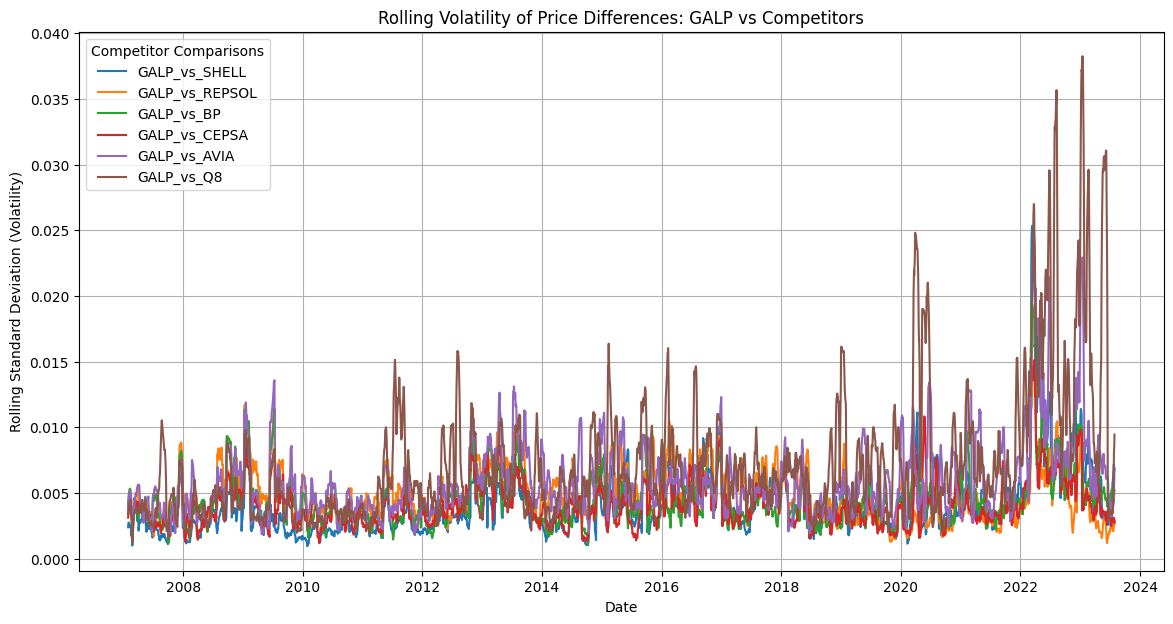

In [89]:
# Step 1: Calculate Rolling Volatility
rolling_window = 30  # Use a 30-day rolling window
volatility = price_differences.copy()
for column in ['GALP_vs_SHELL', 'GALP_vs_REPSOL', 'GALP_vs_BP', 'GALP_vs_CEPSA', 'GALP_vs_AVIA', 'GALP_vs_Q8']:
    volatility[column] = price_differences[column].rolling(window=rolling_window).std()

# Step 2: Plot Rolling Volatility
plt.figure(figsize=(14, 7))
for column in ['GALP_vs_SHELL', 'GALP_vs_REPSOL', 'GALP_vs_BP', 'GALP_vs_CEPSA', 'GALP_vs_AVIA', 'GALP_vs_Q8']:
    plt.plot(volatility['date'], volatility[column], label=column)

plt.title("Rolling Volatility of Price Differences: GALP vs Competitors")
plt.xlabel("Date")
plt.ylabel("Rolling Standard Deviation (Volatility)")
plt.legend(title="Competitor Comparisons")
plt.grid(True)
plt.show()


The plot depicts the rolling volatility, measured as the rolling standard deviation, of price differences between GALP and its competitors (Shell, Repsol, BP, etc.) over time. This analysis highlights periods of stability and instability in the pricing strategies adopted by GALP and its competitors in the fuel market. Notably, the volatility varies both across competitors and over time, offering insights into market dynamics.

There are distinct periods where volatility increases significantly, particularly around 2020–2022. These spikes are likely associated with external disruptions, such as global economic uncertainties, supply chain issues, or fluctuations in crude oil prices. During these intervals, market behavior appears less predictable, indicating heightened competition or external shocks impacting pricing decisions.

The analysis also reveals differences in volatility among competitors. For instance, the GALP vs. Q8 price differences exhibit relatively higher volatility over extended periods, suggesting a more dynamic or competitive relationship between these two brands. On the other hand, GALP vs. Shell and GALP vs. BP display relatively lower volatility for most of the timeframe, indicating more stable pricing strategies or market equilibrium.

From a strategic perspective, periods of low volatility signify stability in pricing strategies, which may be indicative of coordinated market behavior or steady demand-supply conditions. In contrast, periods of high volatility suggest aggressive pricing strategies, market disruptions, or external factors influencing pricing behavior. Monitoring these trends can provide GALP with actionable insights to anticipate competitor moves and adapt its pricing strategy effectively.

This analysis underscores the importance of volatility monitoring for identifying pricing trends, understanding competitive dynamics, and responding proactively to market changes. Such insights are critical for maintaining a competitive edge in a dynamic market environment.

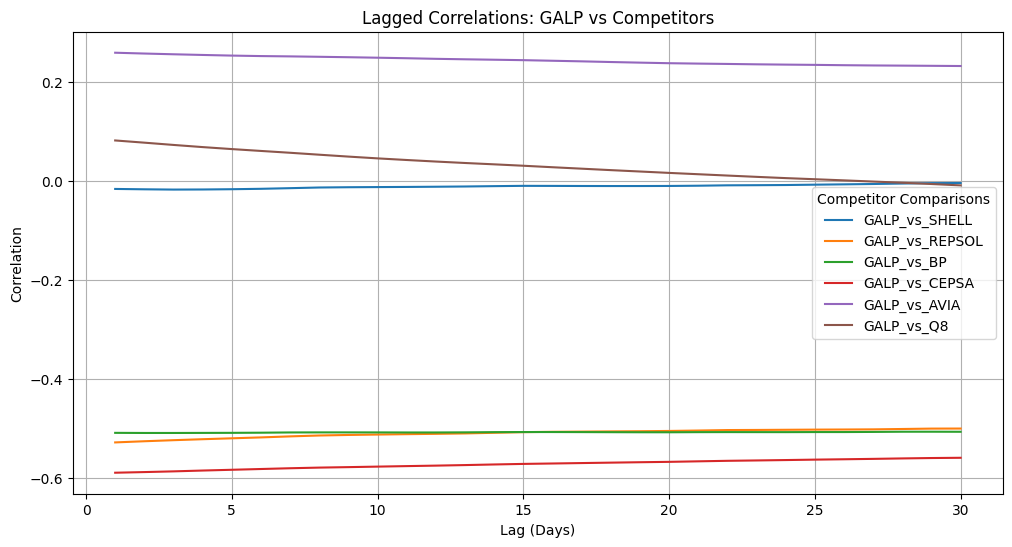

In [90]:
# Step 1: Define lags and initialize results
lags = range(1, 31)  # 1 to 30 days lag
lagged_correlations = {col: [] for col in ['GALP_vs_SHELL', 'GALP_vs_REPSOL', 'GALP_vs_BP', 'GALP_vs_CEPSA', 'GALP_vs_AVIA', 'GALP_vs_Q8']}

# Step 2: Compute lagged correlations
for lag in lags:
    for col in lagged_correlations.keys():
        lagged_correlations[col].append(
            price_differences['GALP'].shift(lag).corr(price_differences[col])
        )

# Step 3: Convert to DataFrame for plotting
lagged_correlation_df = pd.DataFrame(lagged_correlations, index=lags)

# Step 4: Plot results
plt.figure(figsize=(12, 6))
for col in lagged_correlation_df.columns:
    plt.plot(lagged_correlation_df.index, lagged_correlation_df[col], label=col)

plt.title("Lagged Correlations: GALP vs Competitors")
plt.xlabel("Lag (Days)")
plt.ylabel("Correlation")
plt.legend(title="Competitor Comparisons")
plt.grid(True)
plt.show()

The lagged correlation plot provides valuable insights into the relationship between GALP's price differences and those of its competitors over a range of lag days (from 1 to 30). This analysis helps understand whether competitors react to GALP's pricing strategies and the timeframe of their response.

Consistent Correlation Trends
For most competitors, such as SHELL, BP, and REPSOL, the correlations are relatively stable across the 30-day lag period. This consistency suggests that these competitors maintain steady pricing strategies that are not significantly influenced by GALP's past price differences. Their response to GALP’s pricing appears independent and uniform over time.

Positive Correlations
Certain competitors, such as AVIA and Q8, exhibit positive correlations, indicating that their price differences follow GALP’s price trends positively. This behavior implies that when GALP increases its prices, these competitors also adjust their pricing in alignment with GALP. The steady positive correlation reflects a tendency to follow GALP’s lead over the observed timeframe, with a potential delay.

Negative Correlations
In contrast, REPSOL and CEPSA display negative correlations with GALP’s price differences. This indicates a divergent pricing strategy, where these competitors may reduce their relative price differences when GALP raises its prices, potentially to attract more customers by offering comparatively better deals. This oppositional behavior suggests a competitive effort to gain market share against GALP.

Temporal Trends
For some competitors, such as Q8, the correlations decline over time. This indicates that the influence of GALP’s price changes diminishes as the lag increases, suggesting that these competitors are more reactive to GALP’s recent price movements rather than older trends. Such behavior reflects a short-term reaction period.

Actionable Insights
The insights from this analysis highlight opportunities for GALP to refine its pricing strategies. Competitors with strong positive or negative correlations, such as Q8 and REPSOL, should be closely monitored to anticipate their reactions to GALP's price adjustments. By leveraging this knowledge, GALP can make informed decisions to stay competitive and optimize its pricing strategies for maximum advantage in the market.

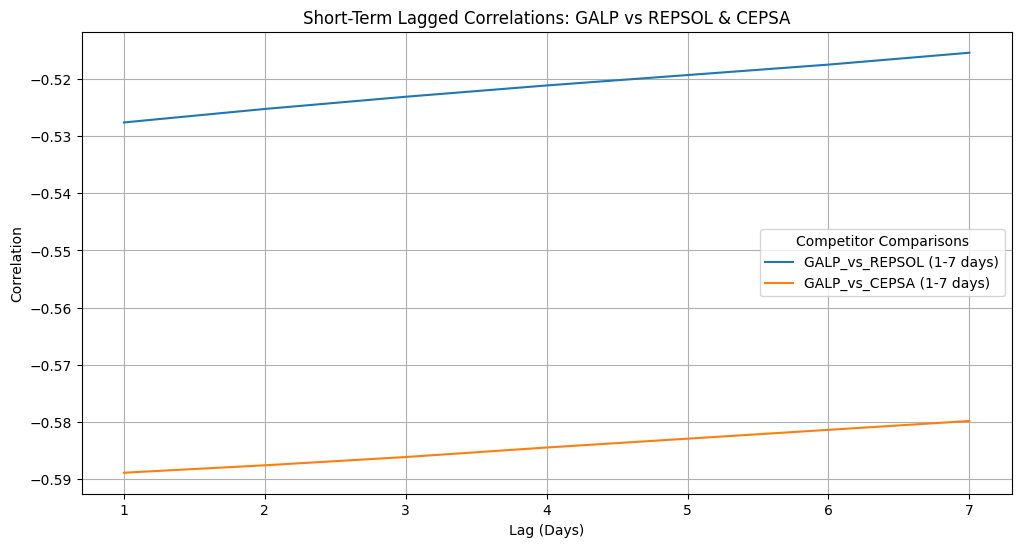

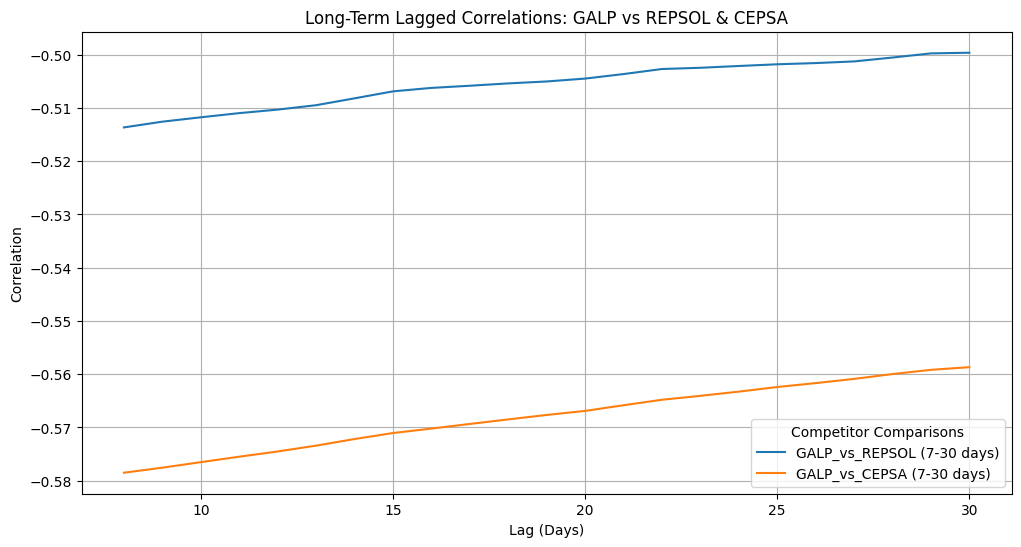

In [91]:
# Step 1: Define the competitors
competitors_to_analyze = ['GALP_vs_REPSOL', 'GALP_vs_CEPSA']

# Step 2: Plot short-term correlations (1–7 days)
plt.figure(figsize=(12, 6))
for competitor in competitors_to_analyze:
    plt.plot(lagged_correlation_df.index[:7], lagged_correlation_df[competitor][:7], label=f"{competitor} (1-7 days)")
plt.title("Short-Term Lagged Correlations: GALP vs REPSOL & CEPSA")
plt.xlabel("Lag (Days)")
plt.ylabel("Correlation")
plt.legend(title="Competitor Comparisons")
plt.grid(True)
plt.show()

# Step 3: Plot long-term correlations (7–30 days)
plt.figure(figsize=(12, 6))
for competitor in competitors_to_analyze:
    plt.plot(lagged_correlation_df.index[7:], lagged_correlation_df[competitor][7:], label=f"{competitor} (7-30 days)")
plt.title("Long-Term Lagged Correlations: GALP vs REPSOL & CEPSA")
plt.xlabel("Lag (Days)")
plt.ylabel("Correlation")
plt.legend(title="Competitor Comparisons")
plt.grid(True)
plt.show()
